<a href="https://colab.research.google.com/github/csnsnigdha18/IIIT-Hyderabad-AI-ML-Research-Work/blob/main/Module_01_Lab_02_MLPractice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##AIML Module 1 - Lab 2
# Machine learning terms and metrics


 In this lab, we will show a part of the ML pipeline by extracting features, training and testing

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
# set randomseed
rng = np.random.default_rng(seed=42)

In this lab, we will use the California Housing dataset. There are 20640 samples, each with 8 attributes like income of the block, age of the houses per district etc. The task is to predict the cost of the houses per district.

Let us download and examine the dataset.

In [ ]:
 dataset =  datasets.fetch_california_housing()
 # print(dataset.DESCR)  # uncomment this if you want to know more about this dataset
 # print(dataset.keys())  # if you want to know what else is there in this dataset
 dataset.target = dataset.target.astype(np.int) # so that we can classify
 print(dataset.data.shape)
 print(dataset.target.shape)

(20640, 8)
(20640,)


<ipython-input-2-60ae2e9a125e>:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dataset.target = dataset.target.astype(np.int) # so that we can classify


Here is a function for calculating the 1-nearest neighbours

In [ ]:
def NN1(traindata, trainlabel, query):
  diff  = traindata - query  # find the difference between features. Numpy automatically takes care of the size here
  sq = diff*diff # square the differences
  dist = sq.sum(1) # add up the squares
  #It gives the EUCLIDEAN DISTANCE upto here
  label = trainlabel[np.argmin(dist)] # our predicted label is the label of the training data which has the least distance from the query
  #The numpy. argmin() method returns indices of the min element of the array in a particular axis. Syntax : numpy.argmin(array, axis = None, out = None)
  return label

def NN(traindata, trainlabel, testdata):
  # we will run nearest neighbour for each sample in the test data
  # and collect the predicted classes in an array using list comprehension
  predlabel = np.array([NN1(traindata, trainlabel, i) for i in testdata])
  return predlabel

We will also define a 'random classifier', which randomly allots labels to each sample

In [ ]:
def RandomClassifier(traindata, trainlabel, testdata):
  # in reality, we don't need these arguments

  classes = np.unique(trainlabel)
  rints = rng.integers(low=0, high=len(classes), size=len(testdata))
  predlabel = classes[rints]
  return predlabel

Let us define a metric 'Accuracy' to see how good our learning algorithm is. Accuracy is the ratio of the number of correctly classified samples to the total number of samples. The higher the accuracy, the better the algorithm.

In [ ]:
def Accuracy(gtlabel, predlabel):
  assert len(gtlabel)==len(predlabel), "Length of the groundtruth labels and predicted labels should be the same"
  correct = (gtlabel==predlabel).sum() # count the number of times the groundtruth label is equal to the predicted label.
  return correct/len(gtlabel)

Let us make a function to split the dataset with the desired probability.

In [ ]:
def split(data, label, percent):
  # generate a random number for each sample
  rnd = rng.random(len(label))
  split1 = rnd<percent
  split2 = rnd>=percent
  split1data = data[split1,:]
  split1label = label[split1]
  split2data = data[split2,:]
  split2label = label[split2]
  return split1data, split1label, split2data, split2label

We will reserve 20% of our dataset as the test set. We will not change this portion throughout our experiments

In [ ]:
testdata, testlabel, alltraindata, alltrainlabel = split(dataset.data, dataset.target, 20/100)
print('Number of test samples = ', len(testlabel))
print('Number of other samples = ', len(alltrainlabel))
print('Percent of test data = ', len(testlabel)*100/len(dataset.target),'%')

Number of test samples =  4144
Number of other samples =  16496
Percent of test data =  20.07751937984496 %


## Experiments with splits

Let us reserve some of our train data as a validation set

In [ ]:
traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, 75/100)

In [ ]:
traindata.shape, trainlabel.shape, valdata.shape, vallabel.shape

((12368, 8), (12368,), (4128, 8), (4128,))

What is the accuracy of our classifiers on the train dataset?

In [ ]:
trainpred = NN(traindata, trainlabel, traindata)
trainAccuracy = Accuracy(trainlabel, trainpred)
print("Train accuracy using nearest neighbour is ", trainAccuracy)
#Here the training accuracy is always 1 as the train data which consists its neighbors also considers itself as on of the neighbour as it is also present in the train data
#Eg : let us cosider the points 1,2,3,4,5 and if we take 5 as the nearest neighbor the at datapoint 5 it is 5-5=0 is the error so the accuracy is 100%
#This is the Flaw

trainpred = RandomClassifier(traindata, trainlabel, traindata)
trainAccuracy = Accuracy(trainlabel, trainpred)
print("Train accuracy using random classifier is ", trainAccuracy) # for large sample classifiers the accuracy is "(1/n)"

Train accuracy using nearest neighbour is  1.0
Train accuracy using random classifier is  0.164375808538163


For nearest neighbour, the train accuracy is always 1. The accuracy of the random classifier is close to 1/(number of classes) which is 0.1666 in our case.

Let us predict the labels for our validation set and get the accuracy

In [ ]:
valpred = NN(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy using nearest neighbour is ", valAccuracy)

valpred = RandomClassifier(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy using random classifier is ", valAccuracy)

Validation accuracy using nearest neighbour is  0.34108527131782945
Validation accuracy using random classifier is  0.1688468992248062


Validation accuracy of nearest neighbour is considerably less than its train accuracy while the validation accuracy of random classifier is the same. However, the validation accuracy of nearest neighbour is twice that of the random classifier.

Now let us try another random split and check the validation accuracy

In [ ]:
traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, 75/100)
valpred = NN(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy of nearest neighbour is ", valAccuracy)

Validation accuracy of nearest neighbour is  0.34048257372654156


You can run the above cell multiple times to try with different random splits.
We notice that the accuracy is different for each run, but close together.

Now let us compare it with the accuracy we get on the test dataset.

In [ ]:
testpred = NN(alltraindata, alltrainlabel, testdata)
testAccuracy = Accuracy(testlabel, testpred)
print('Test accuracy is ', testAccuracy)

Test accuracy is  0.34917953667953666


### Try it out for yourself and answer:
1. How is the accuracy of the validation set affected if we increase the percentage of validation set? What happens when we reduce it?
2. How does the size of the train and validation set affect how well we can predict the accuracy on the test set using the validation set?
3. What do you think is a good percentage to reserve for the validation set so that thest two factors are balanced?

Answer for both nearest neighbour and random classifier. You can note down the values for your experiments and plot a graph using  <a href=https://matplotlib.org/stable/gallery/lines_bars_and_markers/step_demo.html#sphx-glr-gallery-lines-bars-and-markers-step-demo-py>plt.plot<href>. Check also for extreme values for splits, like 99.9% or 0.1%

#SOLUTIONS

1) The accuracy of the validation set when we **"increase"** the percentage of validation set.. that is we decrease the training size which automatically increases the validation data size..

In [ ]:
train_data, train_label, val_data, val_label = split(alltraindata, alltrainlabel, 55/100)
train_data.shape, train_label.shape, val_data.shape, val_label.shape

((9005, 8), (9005,), (7491, 8), (7491,))

In [ ]:
train_pred_N = NN(train_data, train_label, train_data)
train_Accuracy_N = Accuracy(train_label, train_pred_N)
print("Train accuracy using Nearest Neighbour is ", train_Accuracy_N)

train_pred_R = RandomClassifier(train_data, train_label, train_data)
train_Accuracy_R = Accuracy(train_label, train_pred_R)
print("Train accuracy using Random Classifier is ", train_Accuracy_R)

Train accuracy using Nearest Neighbour is  1.0
Train accuracy using Random Classifier is  0.17368128817323708


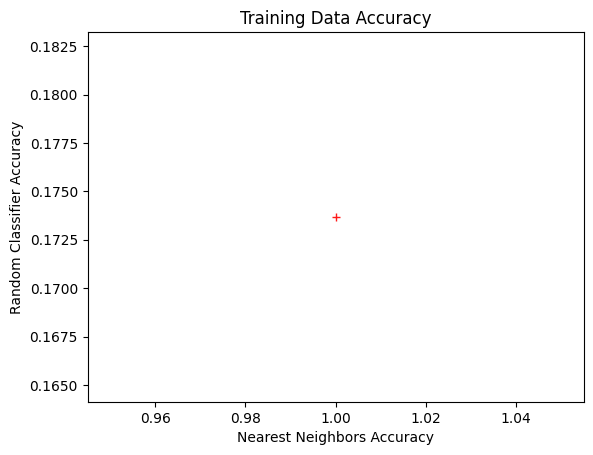

In [ ]:
plt.plot(train_Accuracy_N, train_Accuracy_R, color='red', marker='+', alpha=0.9)
plt.xlabel("Nearest Neighbors Accuracy")
plt.ylabel("Random Classifier Accuracy")
plt.title("Training Data Accuracy")
plt.show()

In [ ]:
val_pred = NN(train_data, train_label, val_data)
val_Accuracy_N = Accuracy(val_label, val_pred)
print("Validation accuracy using nearest neighbour is ", val_Accuracy_N)

val_pred = RandomClassifier(train_data, train_label, val_data)
val_Accuracy_R = Accuracy(val_label, val_pred)
print("Validation accuracy using random classifier is ", val_Accuracy_R)

Validation accuracy using nearest neighbour is  0.328794553464157
Validation accuracy using random classifier is  0.16513149112268055


Hence, we can see that if we increase the validation dataset, there is no much difference in the accuracy using Nearest Neighbors classifier and the Random Classifier but a very slight difference..

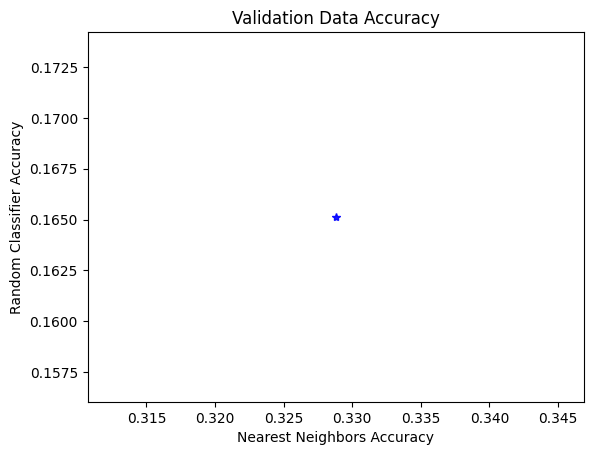

In [ ]:
plt.plot(val_Accuracy_N , val_Accuracy_R, color='blue', marker='*', alpha=0.9)
plt.xlabel("Nearest Neighbors Accuracy")
plt.ylabel("Random Classifier Accuracy")
plt.title("Validation Data Accuracy")
plt.show()

The accuracy of the validation set when we **"decrease"** the percentage of validation set.. that is we decrease the training size which automatically increases the validation data size..

In [ ]:
train_data1, train_label1, val_data1, val_label1 = split(alltraindata, alltrainlabel, 90/100)
print(train_data1.shape, train_label1.shape, val_data1.shape, val_label1.shape)

train_pred1 = NN(train_data1, train_label1, train_data1)
train_Accuracy_N1 = Accuracy(train_label1, train_pred1)
print("Train accuracy using Nearest Neighbour is ", train_Accuracy_N1)

train_pred1 = RandomClassifier(train_data1, train_label1, train_data1)
train_Accuracy_R1 = Accuracy(train_label1, train_pred1)
print("Train accuracy using Random Classifier is ", train_Accuracy_R1)

(14883, 8) (14883,) (1613, 8) (1613,)
Train accuracy using Nearest Neighbour is  1.0
Train accuracy using Random Classifier is  0.16152657394342537


Hence there is no much difference in the accuracy even if we decrease the Validation data..

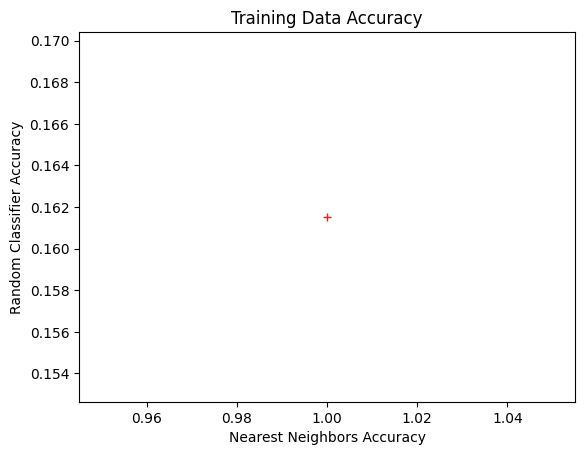

In [ ]:
plt.plot(train_Accuracy_N1, train_Accuracy_R1, color='red', marker='+', alpha=0.9)
plt.xlabel("Nearest Neighbors Accuracy")
plt.ylabel("Random Classifier Accuracy")
plt.title("Training Data Accuracy")
plt.show()

In [ ]:
val_pred1 = NN(train_data1, train_label1, val_data1)
val_Accuracy_N1 = Accuracy(val_label1, val_pred1)
print("Validation accuracy using nearest neighbour is ", val_Accuracy_N1)

val_pred1 = RandomClassifier(train_data1, train_label1, val_data1)
val_Accuracy_R1 = Accuracy(val_label1, val_pred1)
print("Validation accuracy using random classifier is ", val_Accuracy_R1)

Validation accuracy using nearest neighbour is  0.3707377557346559
Validation accuracy using random classifier is  0.1680099194048357


Hence, we can see that if we increase the validation dataset, there is no much difference in the accuracy using Nearest Neighbors classifier and the Random Classifier but a very slight difference..

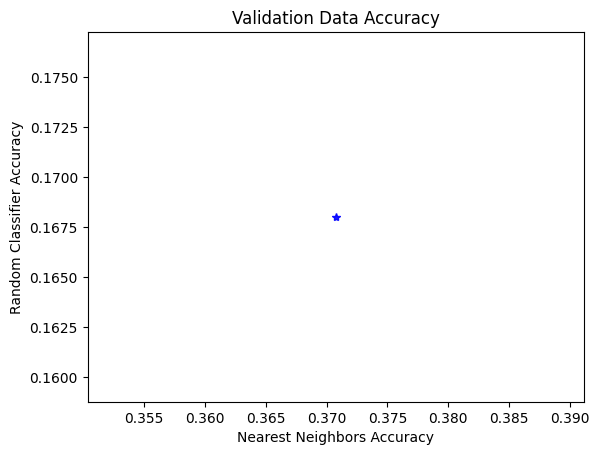

In [ ]:
plt.plot(val_Accuracy_N1 , val_Accuracy_R1, color='blue', marker='*', alpha=0.9)
plt.xlabel("Nearest Neighbors Accuracy")
plt.ylabel("Random Classifier Accuracy")
plt.title("Validation Data Accuracy")
plt.show()

2) When we consider 75% as the training data and the remaining as the Validation data then we have 12368 training samples and 4128 Validation samples.
When we increase the Validation samples then we have 9005 training samples and 7491 Validation samples. There is not much variation in the accuracy as illustrated above. When we decrease the Validation samples then we have 14883 training samples and 1613 Validation samples. There is not much variation in the accuracy as illustrated above.

Now the accuracy on the  test set..

In [ ]:
testpred = NN(alltraindata, alltrainlabel, testdata)
testAccuracy = Accuracy(testlabel, testpred)
print('Test accuracy is ', testAccuracy)

testpred = RandomClassifier(alltraindata, alltrainlabel, testdata)
testAccuracy = Accuracy(testlabel, testpred)
print('Test accuracy is ', testAccuracy)

Test accuracy is  0.34917953667953666
Test accuracy is  0.16336872586872586


3) The choice of the percentage to reserve for the validation set depends on several factors, including the size of your dataset, the complexity of your problem, and the specific algorithms you're using. Balancing the size of the validation set with the training set is important to ensure that you have enough data for training while also having a reliable estimate of your model's performance. There isn't a one-size-fits-all answer, but here are some general guidelines:

1) Hold-Out Validation Ratio: A common practice is to split your dataset into three parts: a training set, a validation set, and a test set. A typical split might be 60-20-20 or 70-15-15, meaning 60% or 70% of the data is for training, and 20% or 15% each is for validation and testing. This gives a balance between having sufficient data for training and reliable estimates of performance.

2) Dataset Size: For very large datasets, you can afford to allocate a smaller percentage for the validation set, as you have a lot of data for training. Conversely, for small datasets, you may need to allocate a larger percentage to validation to ensure robust evaluation.

3) Complexity of the Problem: If your problem is relatively simple, you might need a smaller validation set. However, for complex problems with many features or classes, you might need a larger validation set.

4) Algorithm Choice: Some algorithms may require more or less data for validation. For example, deep learning models often require larger validation sets due to their complexity, while simpler models like linear regression may need less.

5) Cross-Validation: In some cases, you might use techniques like k-fold cross-validation to make the most of your data. This involves dividing the data into k subsets and using each one as a validation set while training on the other k-1 subsets. This can help you get a more robust estimate of your model's performance, especially when data is limited.

6) Domain Knowledge: Your understanding of the problem domain can also guide your decision. If you have domain knowledge suggesting that a particular split ratio is more appropriate, it's worth considering.

So, for our model above according to the accuracy we have a slight increase in the accuracy when we decrease the Validation set ratio having a larger ratio of the traing dataset..

If we take extreme splits like 99.9% for training and 0.1% for validation..

In [ ]:
train_data, train_label, val_data, val_label = split(alltraindata, alltrainlabel, 99.9/100)
print(train_data.shape, train_label.shape, val_data.shape, val_label.shape)

train_pred_N = NN(train_data, train_label, train_data)
train_Accuracy_N = Accuracy(train_label, train_pred_N)
print("Train accuracy using Nearest Neighbour is ", train_Accuracy_N)

train_pred_R = RandomClassifier(train_data, train_label, train_data)
train_Accuracy_R = Accuracy(train_label, train_pred_R)
print("Train accuracy using Random Classifier is ", train_Accuracy_R)

val_pred = NN(train_data, train_label, val_data)
val_Accuracy_N = Accuracy(val_label, val_pred)
print("Validation accuracy using nearest neighbour is ", val_Accuracy_N)

val_pred = RandomClassifier(train_data, train_label, val_data)
val_Accuracy_R = Accuracy(val_label, val_pred)
print("Validation accuracy using random classifier is ", val_Accuracy_R)

(16473, 8) (16473,) (23, 8) (23,)
Train accuracy using Nearest Neighbour is  1.0
Train accuracy using Random Classifier is  0.1660292600012141
Validation accuracy using nearest neighbour is  0.4782608695652174
Validation accuracy using random classifier is  0.2608695652173913


Hence we can see that the validation accuracy has increased as we have only 0.1% as the Validation set..So, it has classified almost 50% of the labels accurately which is not a good fit.

## Multiple Splits

One way to get more accurate estimates for the test accuracy is by using <b>crossvalidation</b>. Here, we will try a simple version, where we do multiple train/val splits and take the average of validation accuracies as the test accuracy estimation. Here is a function for doing this. Note that this function will take a long time to execute.

In [ ]:
# you can use this function for random classifier also
def AverageAccuracy(alldata, alllabel, splitpercent, iterations, classifier=NN):
  accuracy = 0
  for ii in range(iterations):
    traindata, trainlabel, valdata, vallabel = split(alldata, alllabel, splitpercent)
    valpred = classifier(traindata, trainlabel, valdata)
    accuracy += Accuracy(vallabel, valpred)
  return accuracy/iterations # average of all accuracies

In [ ]:
print('Average validation accuracy is ', AverageAccuracy(alltraindata, alltrainlabel, 75/100, 10, classifier=NN))
testpred = NN(alltraindata, alltrainlabel, testdata)
print('test accuracy is ',Accuracy(testlabel, testpred) )

Average validation accuracy is  0.3412798286075546
test accuracy is  0.34917953667953666


This is a very simple way of doing cross-validation. There are many well-known algorithms for cross-validation, like k-fold cross-validation, leave-one-out etc. This will be covered in detail in a later module. For more information about cross-validation, check <a href=https://en.wikipedia.org/wiki/Cross-validation_(statistics)>Cross-validatioin (Wikipedia)</a>

### Questions
1. Does averaging the validation accuracy across multiple splits give more consistent results?
2. Does it give more accurate estimate of test accuracy?
3. What is the effect of the number of iterations on the estimate? Do we get a better estimate with higher iterations?
4. Consider the results you got for the previous questions. Can we deal with a very small train dataset or validation dataset by increasing the iterations?


#1)
Yes, averaging the validation accuracy across multiple splits, such as using k-fold cross-validation, can indeed provide more consistent and reliable results compared to a single validation split. This technique is especially beneficial when you have a limited amount of data.

Here's why averaging validation accuracy across multiple splits can be advantageous:

* Reduced Variance: A single validation split may be affected by randomness in the data, leading to variability in the results. By performing multiple splits and averaging the results, we reduce the impact of this randomness and obtain a more stable estimate of our model's performance.

* Better Generalization: Cross-validation helps our model generalize better to unseen data. It assesses how well our model performs across different subsets of the data, which can lead to a more realistic estimate of its generalization performance.

* Effective Hyperparameter Tuning: When tuning hyperparameters (e.g., learning rate, regularization strength), cross-validation allows you to evaluate different parameter settings on multiple validation sets. This helps you choose the settings that perform well across different data partitions, reducing the risk of overfitting to a single validation split.

* More Robust Performance Metrics: Averaging the performance metrics (e.g., accuracy, F1-score) across multiple cross-validation folds provides a more robust and representative measure of your model's performance compared to a single validation split.

* Higher Confidence: Averaging results across multiple splits gives us greater confidence in the reported performance metrics. We can estimate the mean and standard deviation of the metric, which provides a range of likely values for our model's performance.

Common choices for the number of folds in k-fold cross-validation include 5-fold and 10-fold, but you can choose the value of k based on your dataset size and computational resources. The larger the value of k, the more stable and reliable our cross-validation results are likely to be.

Hence, using cross-validation and averaging validation accuracy across multiple splits is a good practice, especially when dealing with limited data or when we want to obtain a more robust assessment of our machine learning model's performance.

#2)
Using cross-validation and averaging validation accuracy across multiple splits provides a more accurate estimate of a model's performance on unseen data compared to a single validation split. However, it's important to clarify that this estimate is not the same as the actual test accuracy you would obtain on a completely independent test dataset. Instead, it provides a more reliable and realistic approximation of how your model is likely to perform on unseen data.

Here's why cross-validation provides a more accurate estimate:

* Better Generalization Assessment: Cross-validation assesses how well our model generalizes to different subsets of our data. By evaluating the model on multiple validation folds, it provides a more comprehensive view of the model's performance on a variety of data configurations. This helps in obtaining a more accurate estimate of how the model will perform on unseen data.

* Reduced Overfitting Risk: With a single validation split, there is a risk that our model may have overfit to that particular split, leading to an overly optimistic estimate of performance. Cross-validation mitigates this risk by evaluating the model on multiple validation sets, making it less likely that the model's performance is inflated due to random fluctuations.

* Effective Hyperparameter Tuning: When tuning hyperparameters using cross-validation, we are likely to select parameter values that perform consistently well across different data partitions. This leads to a model that is more likely to have good generalization performance.

* Robustness to Data Variability: Real-world datasets can have variability, noise, and outliers. Cross-validation helps in assessing how well our model handles this variability, resulting in a more accurate estimate of its true performance.

While cross-validation provides a more accurate estimate of a model's performance compared to a single validation split, it's essential to keep in mind that the actual test accuracy on a completely independent test dataset may still vary. The test dataset should ideally be a representative sample of the population our model will encounter in practice. Nevertheless, cross-validation remains a valuable tool for model assessment, hyperparameter tuning, and gaining confidence in our model's generalization capabilities.

#3)
The number of iterations, often referred to as the number of epochs in the context of training machine learning models, can have a significant effect on the estimate of your model's performance. However, the relationship between the number of iterations and the estimate is not always straightforward, and there are trade-offs to consider.

Here's how the number of iterations can affect the estimate of our model's performance:

* Underfitting and Convergence: When we train a model for too few iterations, it may not have enough time to converge to a good solution. In this case, our model may underfit the data, resulting in a poor estimate of performance. Increasing the number of iterations can help the model converge to a better solution, reducing underfitting.

* Overfitting: On the other hand, if we train a model for too many iterations, it may start to overfit the training data. Overfitting occurs when the model learns to fit the noise and idiosyncrasies in the training data rather than capturing the underlying patterns. In this scenario, the model's performance on the training data may improve (lower training error), but its performance on unseen data (e.g., validation or test data) may worsen. This can lead to an optimistic estimate of performance if we use the training data for evaluation.

* Early Stopping: To strike a balance between underfitting and overfitting, it's common to use techniques like early stopping. Early stopping involves monitoring the model's performance on a validation set during training. Training is halted when the validation performance starts to degrade, indicating that the model is overfitting. This helps us find a suitable number of iterations that prevent overfitting while allowing the model to converge.

* Hyperparameter Tuning: The number of iterations can be considered a hyperparameter, and its optimal value may depend on the specific problem and dataset. It's common practice to perform hyperparameter tuning, including the number of iterations, to find the best configuration that results in the highest model performance.

Hence, the effect of the number of iterations on the estimate of our model's performance depends on the balance between underfitting and overfitting. Increasing the number of iterations can improve performance up to a point, but beyond that point, it may lead to overfitting. Therefore, it's essential to use techniques like early stopping and hyperparameter tuning to find the optimal number of iterations for your specific model and dataset. A better estimate of performance is obtained when the model generalizes well to unseen data without overfitting to the training data.

#4)
Yes, we can increase the number of iterations and check.
For suppose if we do it for 100 iterations..

In [ ]:
# you can use this function for random classifier also
def AverageAccuracy(alldata, alllabel, splitpercent, iterations, classifier=NN):
  accuracy = 0
  for ii in range(iterations):
    traindata, trainlabel, valdata, vallabel = split(alldata, alllabel, splitpercent)
    valpred = classifier(traindata, trainlabel, valdata)
    accuracy += Accuracy(vallabel, valpred)
  return accuracy/iterations # average of all accuracies

print('Average validation accuracy is ', AverageAccuracy(alltraindata, alltrainlabel, 75/100, 100, classifier=NN))
testpred = NN(alltraindata, alltrainlabel, testdata)
print('test accuracy is ',Accuracy(testlabel, testpred) )

Average validation accuracy is  0.3396869519534453
test accuracy is  0.34917953667953666
